直接舉例:

In [11]:
def outer_func():
    message = 'HI'
    def inner_func():
        print(message)
    return inner_func

In [12]:
my_func = outer_func()

print(my_func)
print(my_func.__name__)

<function outer_func.<locals>.inner_func at 0x000001807733B1E0>
inner_func


In [13]:
my_func()
my_func()
my_func()

HI
HI
HI


注意到，在第二個 cell，我用 <font color='red'> first class function </font> 的概念，創造 ```my_func``` variable。  
在執行第二個 cell 的 ```outer_func``` function 後，```my_func``` 這個 variable 就等於 ```inner_func``` 這個 function。  
那為何在第三個 cell，執行```my_func``` 時，仍會印出屬於```outer_func``` 的 variable(```message```)?

答案就是 <font color='red'> closure</font> 的概念。  
Closure 簡單來說，就是<font color='red'> inner function </font>，她會<font color='green'>記得且有權限取得</font>創造 inner function 的 <font color='green'> local variable (對 inner function 來說是 free variable) </font>。  
這個 local scope 在本例就是 ```my_func``` block 內。

> "Therefore, in simple terms: A closure is an inner function that remembers and has access to variables in the local scope in which it was created even after the outer function has finished executing".

在剛剛的例子中，```outer_func``` 沒有參數，現在新增一下:
---
注意到我們仍沒有給 ```inner_func``` 任何參數:

In [15]:
def outer_func(msg):
    message = msg
    def inner_func(): 
        print(message)
    return inner_func

In [16]:
my_func = outer_func()

TypeError: outer_func() missing 1 required positional argument: 'msg'

In [17]:
my_func = outer_func('HI')
my_func2 = outer_func('HELLO')

my_func()
my_func2()

HI
HELLO


現在在看一個稍微複雜的 code:

In [18]:
import logging
logging.basicConfig(filename='example.log', level=logging.INFO)


def logger(func):
    def log_func(*args):
        logging.info(
            'Running "{}" with arguments {}'.format(func.__name__, args))
        print(func(*args))
    return log_func


def add(x, y):
    return x+y


def sub(x, y):
    return x-y

我定義```logger``` function，她的參數是```func```。 回傳值是 inner function(```log_func```)。  
這個 ```log_func``` 可以使用 <font color='red'> 任意多個 </font> 參數。(這就是 ```*args```的意思)  
```logging.info``` 會在本地端新增一個檔案。  
最後，我印出 ```func(*args)```(而這對 ```log_func``` 來說是一個 free variable，並且因為 closure 的關係 ```log_func```有權取用)

In [19]:
add_logger = logger(add)
sub_logger = logger(sub)

add_logger(3, 3)
add_logger(4, 5)

sub_logger(10, 5)
sub_logger(20, 10)


6
9
5
10


1. 定義變數 ```add_logger```，她等於 ```log_func```，並且參數 ```func``` 帶的是 ```add``` function。  
同理 for ```sub_logger```。  

2. 執行變數 ```add_logger```，因為 ```func``` 可以帶任意多個參數(此例帶 ```3``` 與 ```3```)。  
最後的確印出我們想要的。  

檢查本地資料夾，發現多個一個 example log 的檔案。  
---
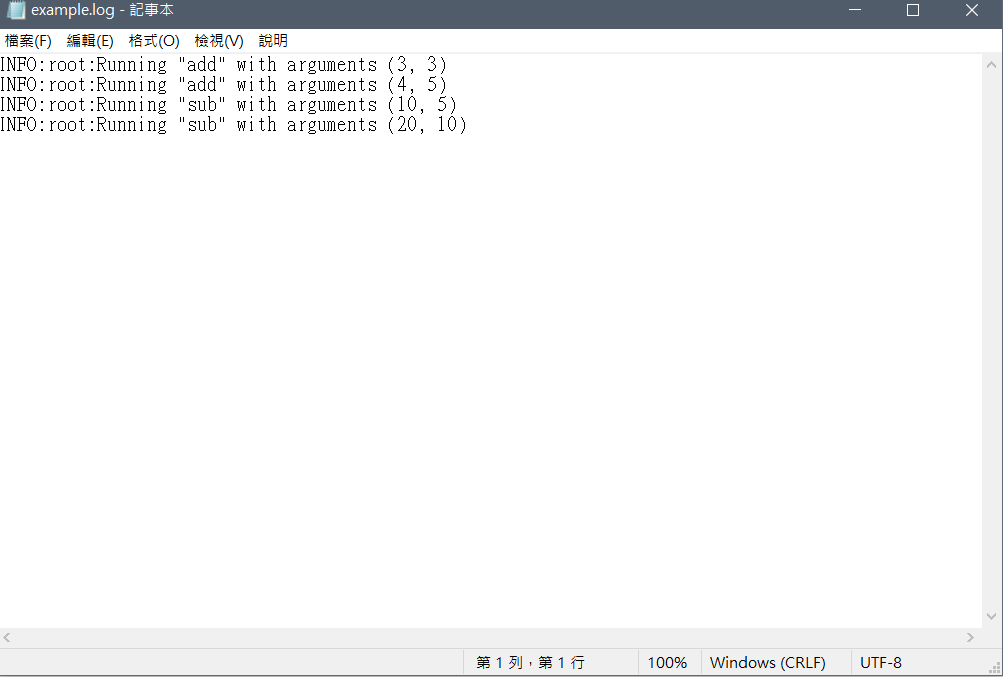